In [5]:
import sys
sys.path.append("..")
from glob import glob
import pandas as pd

In [7]:
name = "MUTAG"
model = "CNN"

parent_paths = glob(f"../logs/{name}/{model}/*")
# for p in parent_paths:
    

In [8]:
p = parent_paths[0]

In [19]:
df = pd.DataFrame()
for path in glob(p + "/train_log/*.csv"):
    df = df.append(pd.read_csv(path))
df.reset_index(inplace=True)

In [15]:
import seaborn as sns

In [118]:
i = 0
name = "MUTAG"
#########################################################
for name in ["MUTAG", "COLLAB", "DD", "REDDIT-BINARY", "subset1", "poisson", "new_poisson"]:
    print("="*20)
    print(name)
    # concat csv
    i = 0
    df = pd.DataFrame()
    
    for model in ["CNN", "BrainCNN"]:
        parent_paths = glob(f"../logs/{name}/{model}/*")

        for p in sorted(parent_paths):
            a = pd.DataFrame()
            for path in glob(p + "/train_log/*.csv"):
                a = a.append(pd.read_csv(path))
            a.reset_index(inplace=True)

            # print("="*20)
            # print(p.split("/")[-1])
            sort, resize, lr = p.split("/")[-1].split("_")

            for e in [9, 19, 29, 39, 49]:
                same_epoch = a.query("epoch==@e")
                ave_val_acc = same_epoch["val_acc"].mean()
                std_val_acc = same_epoch["val_acc"].std()
                # print(f"epoch {e+1} : {round(ave_val_acc*100, 2)} ± {round(std_val_acc*100, 2)}")

                df = df.append(
                    pd.Series({"model": model, "sort": sort, "resize": int(resize), "lr": float(lr),
                     "epoch": e, "ave_acc": ave_val_acc, "std_acc": std_val_acc
                    }, name=i)
                )

                i+=1

    ###################################################
    # search max value
    max_df = pd.DataFrame()

    g = df.groupby(["model", "sort"])
    for name, d in g:
        max_acc = d["ave_acc"].max()
        max_data = d.query("ave_acc==@max_acc")
    #     print(name, f"{round(max_data.ave_acc*100,2)} ± {round(max_data.std_acc*100,2)}")
        max_df = max_df.append(max_data)
    max_df.reset_index(inplace=True)

    for i in max_df.iterrows():
        print(i[1].model, i[1].sort, f"{round(i[1].ave_acc*100,2)} ± {round(i[1].std_acc*100, 2)}")

MUTAG
BrainCNN shuffle 77.13 ± 10.35
BrainCNN sort 83.04 ± 9.82
CNN shuffle 81.99 ± 9.29
CNN sort 85.18 ± 8.08
CNN sort 85.18 ± 8.08
COLLAB
BrainCNN shuffle 59.28 ± 1.49
BrainCNN sort 70.42 ± 1.44
CNN shuffle 69.26 ± 1.98
CNN sort 76.02 ± 1.53
DD
BrainCNN shuffle 70.12 ± 5.45
BrainCNN sort 70.81 ± 5.6
CNN shuffle 74.96 ± 5.04
CNN sort 74.62 ± 4.62
REDDIT-BINARY
BrainCNN shuffle 70.05 ± 5.61
BrainCNN sort 85.05 ± 2.44
CNN shuffle 78.5 ± 3.44
CNN sort 89.25 ± 1.59
subset1
BrainCNN shuffle 87.22 ± 6.9
BrainCNN sort 98.08 ± 0.89
CNN shuffle 71.81 ± 2.31
CNN sort 99.16 ± 0.25
CNN sort 99.16 ± 0.24
poisson


UndefinedVariableError: name 'epoch' is not defined

1
1
1
2


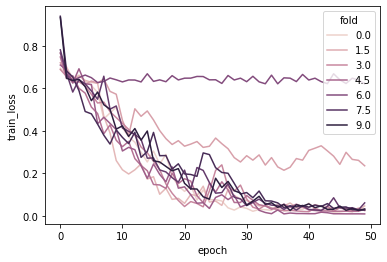

In [22]:
sns.lineplot(x="epoch", y="train_loss", data=df, hue="fold")

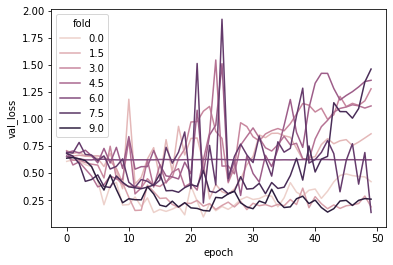

In [23]:
sns.lineplot(x="epoch", y="val_loss", data=df, hue="fold")

In [48]:
import networkx as nx
import numpy as np
from tqdm import tqdm

In [112]:
df = pd.DataFrame()
i = 0
for kind in ["BA", "Growth", "Attach", "Random"]:
    paths = glob(f"../graph_data/new_poisson/graph/{kind}/*")
    for p in tqdm(paths):
        G = nx.read_adjlist(p)
        ave_degs = np.average([d[1] for d in list(G.degree())])
        num_edge = nx.number_of_edges(G)
        num_node = nx.number_of_nodes(G)   
        df = df.append(pd.Series({"kind":kind,"node" : num_node, "edges": num_edge, "ave_deg": ave_degs}, name=i))
        i+=1

100%|██████████| 5000/5000 [00:14<00:00, 352.19it/s]


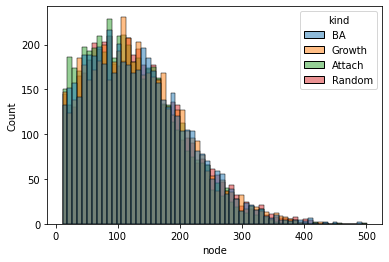

In [113]:
sns.histplot(x="node",data=df,hue="kind")

In [115]:
df["node"].max()

501.0